In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 156M/163M [00:00<00:00, 211MB/s]
100% 163M/163M [00:00<00:00, 212MB/s]


In [ ]:
from zipfile import ZipFile
data='/content/face-mask-dataset.zip'
with ZipFile(data,'r') as zip:
  zip.extractall()
  print("Data set is extracted")

Data set is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_3339.jpg', 'with_mask_3373.jpg', 'with_mask_482.jpg', 'with_mask_262.jpg', 'with_mask_1909.jpg']
['with_mask_3281.jpg', 'with_mask_530.jpg', 'with_mask_2357.jpg', 'with_mask_3138.jpg', 'with_mask_3670.jpg']


In [ ]:
without_mask_files=os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_765.jpg', 'without_mask_1608.jpg', 'without_mask_1885.jpg', 'without_mask_2723.jpg', 'without_mask_3205.jpg']
['without_mask_213.jpg', 'without_mask_1676.jpg', 'without_mask_680.jpg', 'without_mask_2932.jpg', 'without_mask_2871.jpg']


In [ ]:
print("No of with mask images: ",len(with_mask_files))
print("No of without mask images: ",len(without_mask_files))


No of with mask images:  3725
No of without mask images:  3828


creating a labels for the two class of images

with mask ->1


without mask ->0

In [ ]:
with_mask_label=[1]*3725
without_mask_label=[0]*3828


In [ ]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
labels=with_mask_label+without_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying with mask images



In [ ]:
img=mpimg.imread("/content/data/with_mask/with_mask_2660.jpg")
imgplot=plt.imshow(img)
plt.show()

In [ ]:
img=mpimg.imread("/content/data/without_mask/without_mask_1926.jpg")
imgplot=plt.imshow(img)
plt.show()

1) Image Processing

2) Convert the images to numpy array

In [ ]:
# convert images to a numpy array
with_mask_path='/content/data/with_mask/'

data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


# convert images to a numpy array
without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
print(data[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)


numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)

(7553, 128, 128, 3)


In [ ]:
print(y.shape)

(7553,)


Train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
print(x_train[0])

[[[ 99 103 112]
  [ 98 102 111]
  [ 98 102 111]
  ...
  [143 146 155]
  [146 149 157]
  [148 151 158]]

 [[ 97 101 110]
  [ 97 101 110]
  [ 97 101 110]
  ...
  [144 147 156]
  [146 149 157]
  [147 150 157]]

 [[ 98 102 111]
  [ 99 103 112]
  [ 99 103 112]
  ...
  [146 149 158]
  [146 149 157]
  [145 148 155]]

 ...

 [[ 14  12  13]
  [ 14  12  13]
  [ 12  10  11]
  ...
  [ 41  30  28]
  [ 42  31  30]
  [ 42  30  30]]

 [[ 14  12  13]
  [ 13  11  12]
  [ 13  11  12]
  ...
  [ 40  29  27]
  [ 41  29  28]
  [ 40  28  28]]

 [[ 15  13  14]
  [ 15  13  14]
  [ 13  11  12]
  ...
  [ 40  28  28]
  [ 41  29  29]
  [ 40  28  28]]]


In [ ]:
x_train_scaled[0]


array([[[0.38823529, 0.40392157, 0.43921569],
        [0.38431373, 0.4       , 0.43529412],
        [0.38431373, 0.4       , 0.43529412],
        ...,
        [0.56078431, 0.57254902, 0.60784314],
        [0.57254902, 0.58431373, 0.61568627],
        [0.58039216, 0.59215686, 0.61960784]],

       [[0.38039216, 0.39607843, 0.43137255],
        [0.38039216, 0.39607843, 0.43137255],
        [0.38039216, 0.39607843, 0.43137255],
        ...,
        [0.56470588, 0.57647059, 0.61176471],
        [0.57254902, 0.58431373, 0.61568627],
        [0.57647059, 0.58823529, 0.61568627]],

       [[0.38431373, 0.4       , 0.43529412],
        [0.38823529, 0.40392157, 0.43921569],
        [0.38823529, 0.40392157, 0.43921569],
        ...,
        [0.57254902, 0.58431373, 0.61960784],
        [0.57254902, 0.58431373, 0.61568627],
        [0.56862745, 0.58039216, 0.60784314]],

       ...,

       [[0.05490196, 0.04705882, 0.05098039],
        [0.05490196, 0.04705882, 0.05098039],
        [0.04705882, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(12,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [ ]:
# compile the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# traning the neural network

history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 9s 21ms/step - loss: 0.4376 - acc: 0.8335 - val_loss: 0.2396 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 2s 13ms/step - loss: 0.2370 - acc: 0.9023 - val_loss: 0.2213 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 2s 13ms/step - loss: 0.1882 - acc: 0.9224 - val_loss: 0.2308 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 2s 13ms/step - loss: 0.1500 - acc: 0.9435 - val_loss: 0.1795 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 2s 13ms/step - loss: 0.1243 - acc: 0.9520 - val_loss: 0.1993 - val_acc: 0.9256


Model Evaluation

In [ ]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print("Test Accuracy",accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2088 - acc: 0.9298
Test Accuracy 0.929847776889801


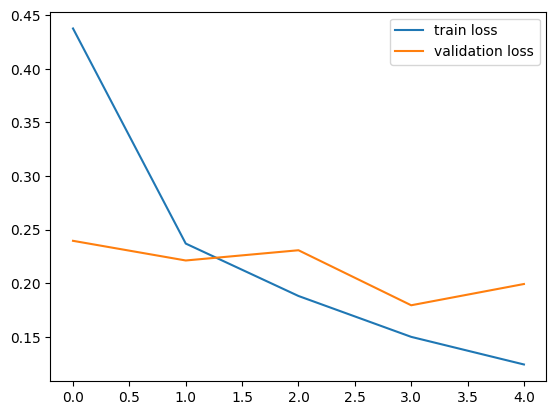

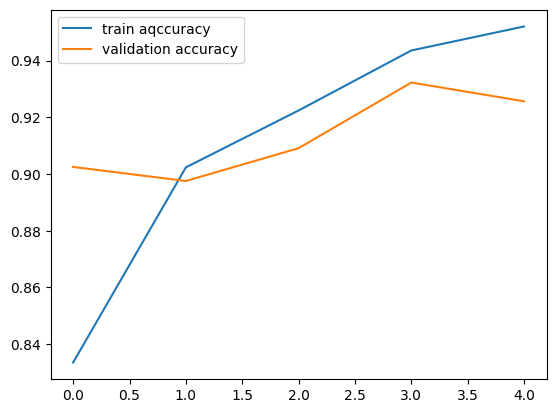

In [ ]:
h=history

# plot the loss value

plt.plot(h.history['loss'],label='train loss')

plt.plot(h.history['val_loss'],label='validation loss')

plt.legend()
plt.show()

# plot the Accuracy value

plt.plot(h.history['acc'],label='train aqccuracy')

plt.plot(h.history['val_acc'],label='validation accuracy')

plt.legend()
plt.show()



Predictive system

path of the image to be predicted/content/download.jfif


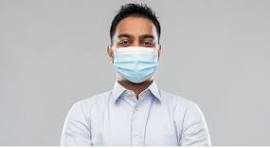

1/1 [==============================] - 0s 22ms/step
[[0.56166524 0.45653552]]
0
The person in the image is wearning a mask


In [ ]:
input_image_path=input("path of the image to be predicted")
input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print("The person in the image is wearning a mask")

else:
  print("The person in the image is not wearning a mask")
